In [4]:
## Decision Tree Classifier on Car Evaluation Dataset from  https://archive.ics.uci.edu/dataset/19/car+evaluation ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [5]:
# Fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# Data (as pandas dataframes) 
x = car_evaluation.data.features 
y = car_evaluation.data.targets 

# Encode catagorical data with OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
x_encoded = encoder.fit_transform(x)

# Check encoded data is created correctly 
#print (x_encoded)
#print (encoder.get_feature_names_out())

# Convert back to DataFrame with proper column names
x_encoded = pd.DataFrame(x_encoded, columns=encoder.get_feature_names_out())

# Format settings to show more rows and columns when printing dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Show x an y data (uncomment to see)
#print (x_encoded)
#print(y.head())

In [13]:
# Train/test split and decision tree classifier with a 70/30 split
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=0, stratify=y)

# Create Decision Tree with a speified depth
clf = DecisionTreeClassifier(max_depth= 5, random_state=0)
#clf = DecisionTreeClassifier(random_state=0) # no depth specified
clf.fit(x_train, y_train)

# Evaluate on test set
preds = clf.predict(x_test)
#print ("test accuracy:", accuracy_score(y_test, preds)) # Print test accuracy

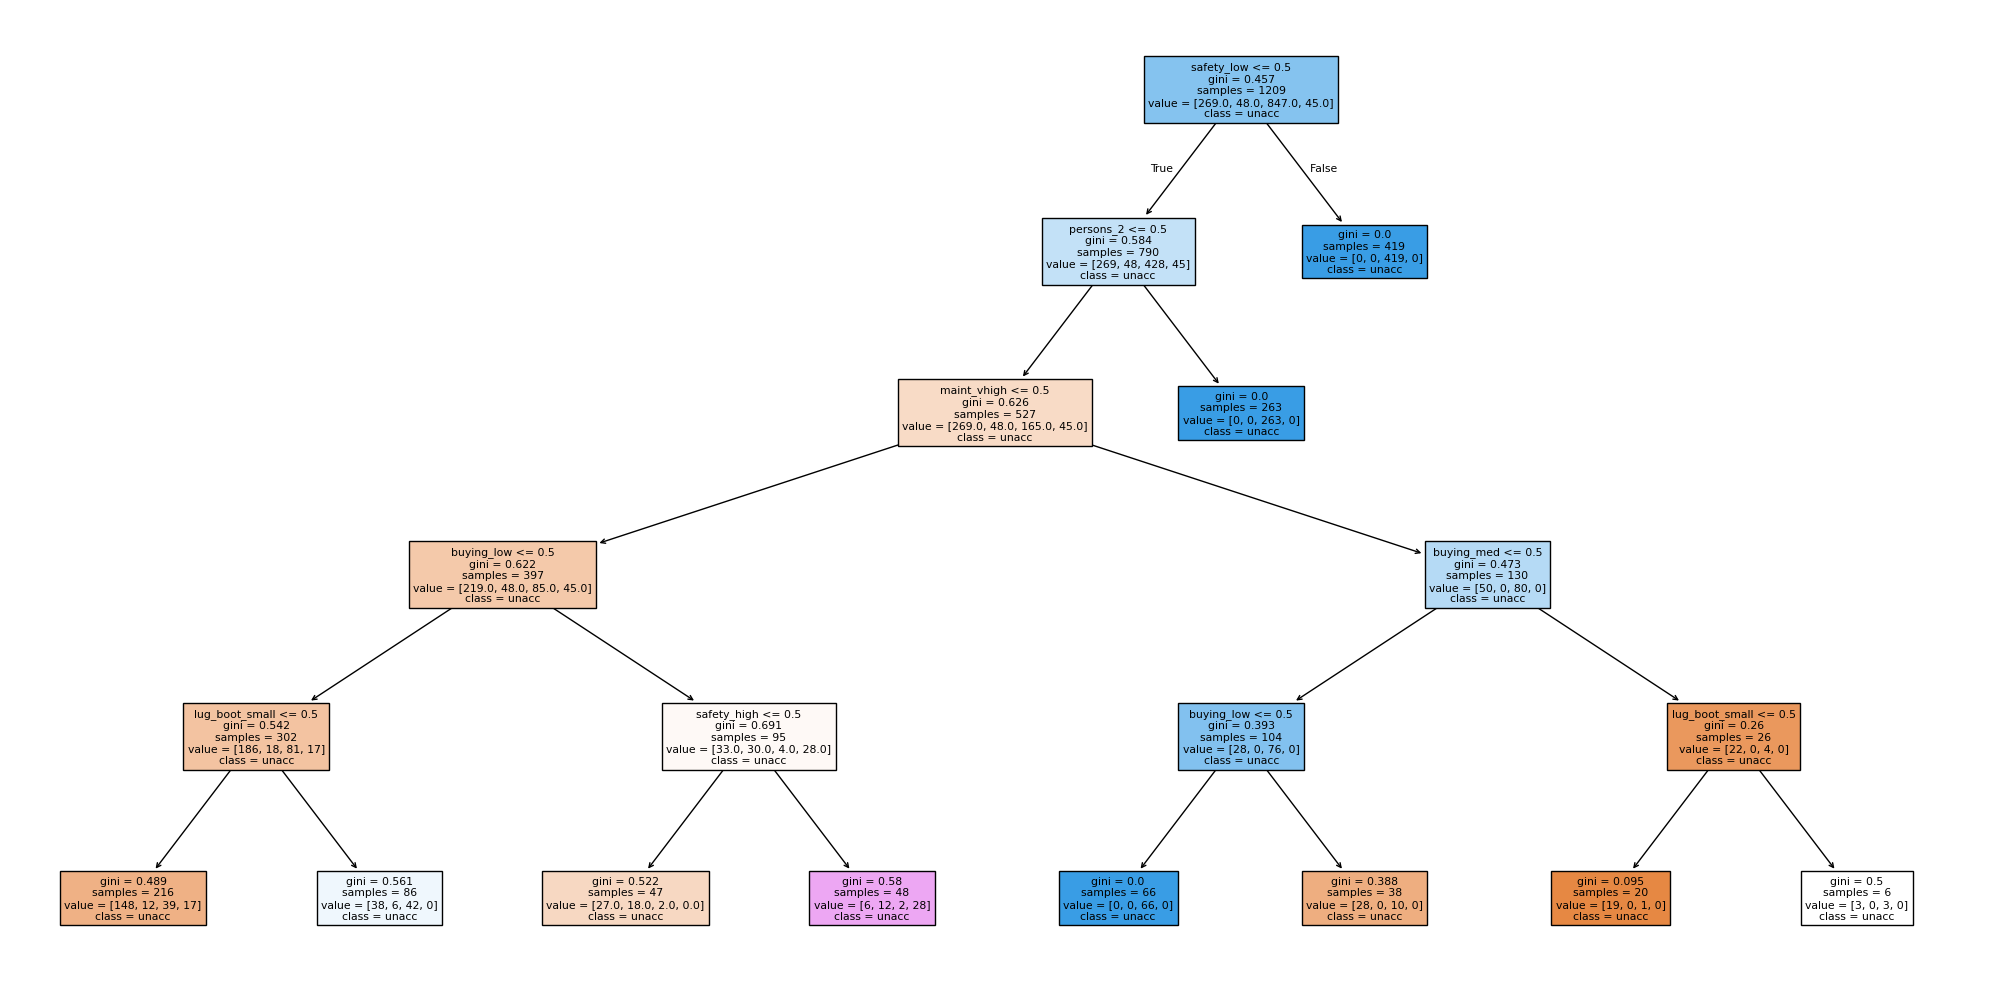

In [14]:
# Plot tree graphically
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=x_encoded.columns, class_names=y['class'].values, filled=True)
plt.tight_layout()
plt.show()

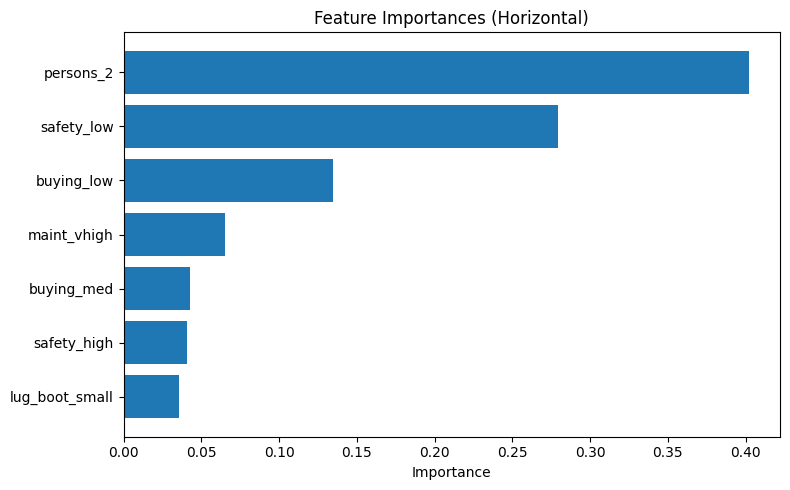

In [15]:
# Find feature importances

# Create a DataFrame for readability
feature_names = x_encoded.columns
importances = clf.feature_importances_

feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})

feat_imp = feat_imp.sort_values(by="Importance", ascending=True)
#print(feat_imp)

# Show feature importance graphically
feat_imp_nonzero = feat_imp[feat_imp["Importance"] > 0] # only include features that have some importance
plt.figure(figsize=(8,5))
plt.barh(feat_imp_nonzero["Feature"], feat_imp_nonzero["Importance"])

plt.xlabel("Importance")
plt.title("Feature Importances (Horizontal)")
plt.tight_layout()
plt.show()

#print (f"Most important features:{clf.feature_importances_}")

In [16]:
# Define cross-validation
kf = KFold(n_splits = 9, shuffle = True, random_state = 0)

# Cross-validate
cv_scores =  cross_val_score(clf, x_encoded, y, cv=kf)
print (f"Cross-Validation Scores:{cv_scores}")
print (f"Highest Score:{np.max(cv_scores)}")
print (f"Lowest Score:{np.mean(cv_scores)}")


Cross-Validation Scores:[0.90104167 0.83333333 0.88541667 0.84895833 0.84895833 0.83333333
 0.859375   0.85416667 0.875     ]
Highest Score:0.9010416666666666
Lowest Score:0.8599537037037037
